# Hough Lines

### Import resources and display the image

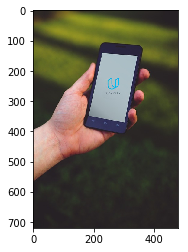

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/phone.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Perform edge detection

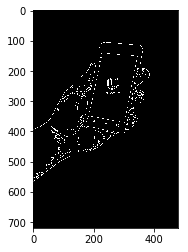

In [7]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 30
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

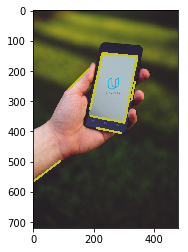

In [16]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 80
min_line_length = 50
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(200,200,20),5)
        
plt.imshow(line_image)

In [53]:
def draw_hough_line(img):
    
    canny_thresh = (125, 250)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_canny = cv2.Canny(img_gray, canny_thresh[0], canny_thresh[1])
    
    rho = 1  # resulotion
    theta = np.pi/180
    threshold = 60
    minLineLength = 60
    maxLineGap = 15
    
    lines = cv2.HoughLinesP(img_canny, rho, theta, threshold, minLineLength, maxLineGap)
    
    img_copy = np.copy(img)
    
    try:
        for line in lines:
            for x1, y1, x2, y2 in line:
                img_copy = cv2.line(img_copy, (x1, y1), (x2, y2), (0, 240, 240), 3)
    except:
        print('Find no line')
    
    return img_canny, img_copy

def show_hough_line(filename):
    
    img = cv2.imread(filename)
    
    img_copy = np.copy(img)
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    
    img_canny, img_line = draw_hough_line(img_copy)
    
    _, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
    ax1.imshow(img_copy)
    ax1.set_title('original')
    
    ax2.imshow(img_canny,  cmap = 'gray')
    ax2.set_title('canny_img')
    
    ax3.imshow(img_line)
    ax3.set_title('line_img')
    
    plt.show()

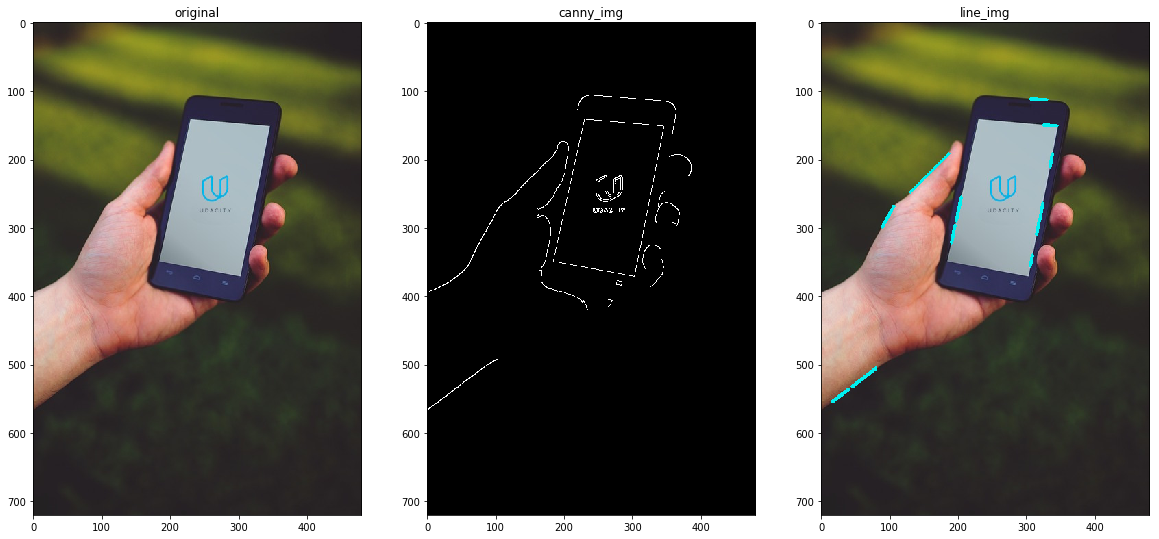

In [54]:
show_hough_line('images/phone.jpg')

In [ ]:
!python3 real_time_hough_line.py